In [1]:

# ___Author____: Barry Ntsiba 
# contact: barry-ntsiba@pm.me
        
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pylab import * 
import pylab as plab
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import folium
from branca.colormap import linear
import os
import json
%matplotlib inline


# use ggplot style
matplotlib.style.use('ggplot')
import csv as csv
#from itertools import groupby
pd.options.display.max_info_columns
pd.options.display.max_columns=100 # set max columns to 100
#np.set_printoptions(precision=4, suppress=True)


Question 1: Which product is the most complained about?

Question 2:  what is the most popular way of submitting complaints?

Question 3:  Is it possible to identify the top 10 company that the consumers have and least complain about? 

Question 4: what are the top 5 issues that consumers complained about?

Question 5: Is there any particular month or period of the year in which consumers’ complaints are not answer on 

QUESTION 6 :  how does the response to consumers’ complaint spread over the year  

Question 7: which states have the highest mortgage complaints?

Question 8: how many credit card complaints have been filled in California compared to the state of Montana?

Question 9: On



link to the data:
http://www.consumerfinance.gov/data-research/consumer-complaints/

The Consumer Complaint Database contains complaints we’ve received about consumer financial products and services, including:

Bank accounts or services
Consumer loans
Credit cards
Credit reporting
Debt collection
Money transfers
Mortgages
Prepaid cards
Payday loans
Student loans (private student loans and federal student loan servicing)
Virtual currency
Other consumer loan (such as pawn and title loans)
Other financial service (such as credit repair and debt settlement)



In [ ]:
#read  in csv
complaint_data=pd.read_csv('ConsumerComplaintsusa.csv', sep=',',header='infer',parse_dates=True, dayfirst = True, engine="python")
complaint_data.values

In [6]:
complaint_data.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882


In [7]:
# create a temporary dataset

df = complaint_data
df.head(200)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
2,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
4,07/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,06106,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,475823
5,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,TX,75025,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468981
6,07/29/2013,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,"NRA Group, LLC",VA,20147,NaN,NaN,Web,08/07/2013,Closed with non-monetary relief,Yes,No,467801
7,07/29/2013,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt was paid,NaN,NaN,"SunTrust Banks, Inc.",FL,32818,NaN,NaN,Referral,08/01/2013,Closed with explanation,Yes,Yes,475728
8,07/29/2013,Credit card,NaN,Billing statement,NaN,NaN,NaN,Citibank,OH,45247,NaN,NaN,Referral,07/30/2013,Closed with explanation,Yes,Yes,469026
9,07/29/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,NV,89511,NaN,NaN,Referral,07/30/2013,Closed with explanation,Yes,Yes,469035


In [163]:
# Verify the type of the object
type(df)

pandas.core.frame.DataFrame

In [183]:

# Internal nature of the object
print("The shape is: ",df.shape)
print(df.dtypes)

The shape is:  (670598, 17)
Date received                     object
Product                           object
Sub_product                       object
issue                             object
sub-issue                         object
consumer_complaint_explanation    object
Company_response                  object
Company                           object
State                             object
Postal_code                       object
Tags                              object
Consumer_consent_provided         object
Complaint_Submission_type         object
Company_response_to_consumer      object
Timely_response_yes_no            object
Consumer disagrees                object
Complaint ID                       int64
dtype: object


#

In [19]:

# rename some columns 

df.columns = [  'Date received','Product','Sub_product','issue','sub-issue','consumer_complaint_explanation','Company_response','Company','State','Postal_code','Tags','Consumer_consent_provided','Complaint_Submission_type','Date_sent_to_company','Company_response_to_consumer','Timely_response_yes_no','Consumer disagrees','Complaint ID' ]              

In [179]:
print(df.dtypes)

In [196]:
df.head(2)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Tags,Consumer_consent_provided,Complaint_Submission_type,Date_sent_to_company,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889


In [197]:

# copy the data to csv file 
df.to_csv('usconsumercomplaints.csv')

### new dataset 

In [2]:
#read  in csv
complaint_data=pd.read_csv('usconsumercomplaints.csv', sep=',',header='infer',index_col=14,parse_dates=True, dayfirst = True, engine="python")
complaint_data.values

array([[0, '07/29/2013', 'Consumer Loan', ..., 'Yes', 'No', 468882],
       [1, '07/29/2013', 'Bank account or service', ..., 'Yes', 'No',
        468889],
       [2, '07/29/2013', 'Bank account or service', ..., 'Yes', 'No',
        468879],
       ..., 
       [670595, '11/17/2016', 'Credit reporting', ..., 'Yes', 'Yes',
        2212094],
       [670596, '09/22/2016', 'Credit card', ..., 'Yes', nan, 2126003],
       [670597, '08/13/2016', 'Consumer Loan', ..., 'Yes', 'No', 2062419]], dtype=object)

In [3]:
# create a new dataframe
df = complaint_data
df.head(1)

,Unnamed: 0,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Tags,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,Complaint ID
Date_sent_to_company,,,,,,,,,,,,,,,,,,
2013-07-30,0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,Closed with explanation,Yes,No,468882


In [4]:
# delete unuse variables
variableToDrop = ['Tags', 'Unnamed: 0','Complaint ID']
# Verify whether there are some missing values(nan) in the postcode field, then drop those
df = df.drop(variableToDrop,1).dropna(subset=['Postal_code'])


In [5]:
# verify the data type
print(df.dtypes)

Date received                     object
Product                           object
Sub_product                       object
issue                             object
sub-issue                         object
consumer_complaint_explanation    object
Company_response                  object
Company                           object
State                             object
Postal_code                       object
Consumer_consent_provided         object
Complaint_Submission_type         object
Company_response_to_consumer      object
Timely_response_yes_no            object
Consumer disagrees                object
dtype: object


In [6]:
# setting the index of the dataframe to date time 
df.index.to_datetime(dayfirst=True)

DatetimeIndex(['2013-07-30', '2013-07-31', '2013-07-31', '2013-07-30',
               '2013-07-30', '2013-07-30', '2013-07-08', '2013-01-08',
               '2013-07-30', '2013-07-30',
               ...
               '2016-09-17', '2016-11-15', '2016-09-15', '2016-11-17',
               '2016-10-11', '2016-11-16', '2016-10-26', '2016-11-17',
               '2016-09-22', '2016-07-09'],
              dtype='datetime64[ns]', name='Date_sent_to_company', length=665274, freq=None)

In [7]:
print(df.dtypes)

Date received                     object
Product                           object
Sub_product                       object
issue                             object
sub-issue                         object
consumer_complaint_explanation    object
Company_response                  object
Company                           object
State                             object
Postal_code                       object
Consumer_consent_provided         object
Complaint_Submission_type         object
Company_response_to_consumer      object
Timely_response_yes_no            object
Consumer disagrees                object
dtype: object


## Product 

In [8]:
df["Product"].describe()

count       665274
unique          12
top       Mortgage
freq        208900
Name: Product, dtype: object

In [9]:
 # Make a crosstab to count values of product
    
Product_tab = pd.crosstab(index=df.Product, columns="count_product")
Product_tab 

col_0,count_product
Product,
Bank account or service,74707
Consumer Loan,26443
Credit card,78336
Credit reporting,118665
Debt collection,123479
Money transfers,4540
Mortgage,208900
Other financial service,787
Payday loan,4765


In [10]:
# get some statistics of the overall products
Product_tab.describe()

col_0,count_product
count,12.000000
mean,55439.500000
std,66754.830497
min,13.000000
25%,4188.750000
50%,23973.500000
75%,88418.250000
max,208900.000000


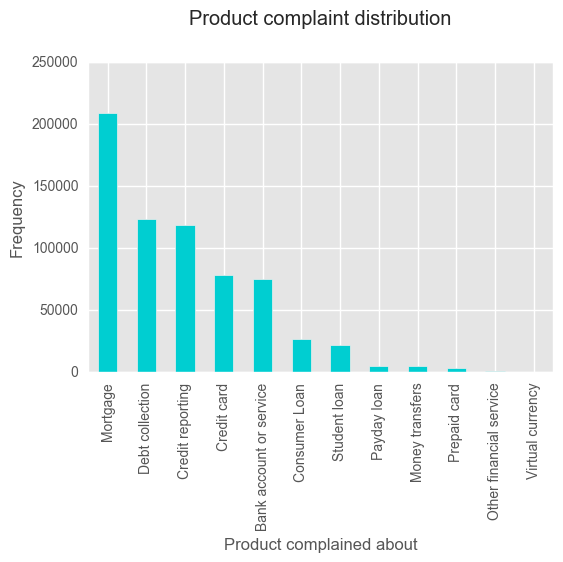

In [11]:
# plot the distribution of complaint by products
bar = df.Product.value_counts().plot(kind='bar', color=['darkturquoise'], label='Product')
plt.title('Product complaint distribution', y=1.1)
plt.ylabel('Frequency')
plt.xlabel('Product complained about')
plt.show()
#plt.savefig('product complaints.png', bbox_inches='tight')

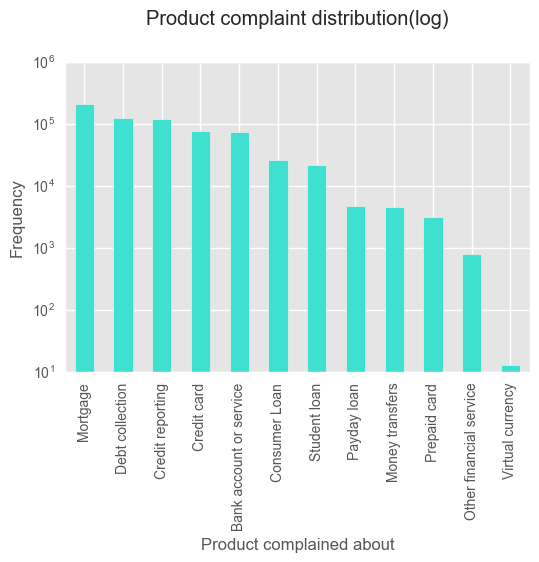

In [12]:
# using log to see the value of financial service and virtual currency

# plot the distribution of complaint by products
barlist = df.Product.value_counts().plot(kind='bar',logy=True, color=['turquoise'], label='Product')
plt.title('Product complaint distribution(log)', y=1.1)
plt.ylabel('Frequency')
plt.xlabel('Product complained about')
plt.show()
#plt.savefig('product complaints log.png', bbox_inches='tight')


In [13]:
df_mapping = df.loc[:,('State','Product')]

df_mapping["Mortgage"]= df_mapping.Product.str.contains("Mortgage")

df_mapping.Mortgage = df_mapping.Mortgage.astype(int)

df_mapping = df_mapping.loc[:,("State","Mortgage")]

df_mapping.head()

#df_mortagage = df.Product="Mortgage"
#df_mortagage


,State,Mortgage
Date_sent_to_company,,
2013-07-30,VA,0
2013-07-31,CA,0
2013-07-31,NY,0
2013-07-30,GA,0
2013-07-30,CT,1


In [14]:
df_mapping.describe()

,Mortgage
count,665274.000000
mean,0.314006
std,0.463975
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [15]:
# get the united states topology  
us_states = os.path.join('data', 'us-states.json')
# load the topology
geo_json_data = json.load(open(us_states))

In [16]:
from branca.colormap import linear

colormap = linear.YlGn.scale(
    df_mapping.Mortgage.value_counts().min(),
    df_mapping.Mortgage.value_counts().max())

print(colormap(5.0))


#ffffcc


In [17]:
# create a dictionary from the df_mapping dataframe and set its key index to state 
mortgage_dict = df_mapping.set_index('State')['Mortgage']

# print 
mortgage_dict["AL"].head()

AL    1
AL    1
AL    0
AL    0
AL    1
Name: Mortgage, dtype: int32


map the mortgage by state 

In [18]:
mortgage_map = folium.Map([43, -100], zoom_start=4)

mortgage_map.choropleth(
    geo_str=open(us_states).read(),
    data=df_mapping,
    columns=['State', 'Mortgage'],
    key_on='feature.id',
    fill_color='YlGn',
)


#m.save(os.path.join('results', 'GeoJSON_and_choropleth_9.html'))
mortgage_map

C:\Users\User\Miniconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.


## Subproduct complained about

In [19]:
 # Make a crosstab to count values of Sub product

Subproduct_tab = pd.crosstab(index=df.Sub_product, columns="count_Subproduct")
Subproduct_tab 



col_0,count_Subproduct
Sub_product,
(CD) Certificate of deposit,3091
Auto,3106
Cashing a check without an account,552
Check cashing,208
Checking account,52184
Conventional adjustable mortgage (ARM),23550
Conventional fixed mortgage,64842
Credit card,24988
Credit repair,80


In [20]:


# get sub_product statistics 
Subproduct_tab.describe()


col_0,count_Subproduct
count,47.000000
mean,9963.255319
std,17467.774415
min,6.000000
25%,259.500000
50%,2158.000000
75%,12840.000000
max,80707.000000


## complaints Submission_type

In [21]:
df["Complaint_Submission_type"].describe()

count     665274
unique         6
top          Web
freq      444573
Name: Complaint_Submission_type, dtype: object

In [22]:
# get the count of complaints submission by their respective type 
Submission_type_tab = pd.crosstab(index=df.Complaint_Submission_type, columns="Submission_type")
Submission_type_tab


col_0,Submission_type
Complaint_Submission_type,
Email,301
Fax,9426
Phone,46230
Postal mail,43318
Referral,121426
Web,444573


In [23]:
# get complaints submission type statistics
Submission_type_tab.describe()

col_0,Submission_type
count,6.000000
mean,110879.000000
std,168953.906176
min,301.000000
25%,17899.000000
50%,44774.000000
75%,102627.000000
max,444573.000000


In [24]:
# copy the dataframe, to avoid any data loss or issues
df1 = df
df1.head(2)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees
Date_sent_to_company,,,,,,,,,,,,,,,
2013-07-30,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,Phone,Closed with explanation,Yes,No
2013-07-31,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,NaN,Web,Closed with explanation,Yes,No


In [25]:
# create additional columns that extract individual Complaints Submissions types
df1["EmailSubmission"]= df.Complaint_Submission_type.str.contains("Email")
df1["FaxSubmission"]= df.Complaint_Submission_type.str.contains("Fax")
df1["PhoneSubmission"]= df.Complaint_Submission_type.str.contains("Phone")
df1["PostalSubmission"]= df.Complaint_Submission_type.str.contains("Postal mail")
df1["ReferralSubmission"]= df.Complaint_Submission_type.str.contains("Referral")
df1["WebSubmission"]= df.Complaint_Submission_type.str.contains("Web")


In [26]:
# verify that the dataset has been updated
df1.head(1)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,,,,,,,,,,,,,,,,
2013-07-30,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,Phone,Closed with explanation,Yes,No,False,False,True,False,False,False


In [27]:
# create a new data frame  which select individual Complaint submission type
# This will allow easy plotting of the variable Complaint_Submission_type

submitted_via =df1.loc[:,["EmailSubmission","FaxSubmission", "PhoneSubmission","PostalSubmission","ReferralSubmission", "WebSubmission"]]


submitted_via.head()

,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,
2013-07-30,False,False,True,False,False,False
2013-07-31,False,False,False,False,False,True
2013-07-31,False,True,False,False,False,False
2013-07-30,False,False,False,False,False,True
2013-07-30,False,False,False,False,False,True


In [28]:

submitted_via.EmailSubmission = submitted_via.EmailSubmission.astype(int)
submitted_via.FaxSubmission= submitted_via.FaxSubmission.astype(int)
submitted_via.PhoneSubmission= submitted_via.PhoneSubmission.astype(int)
submitted_via.PostalSubmission = submitted_via.PostalSubmission.astype(int)
submitted_via.ReferralSubmission= submitted_via.ReferralSubmission.astype(int)   
submitted_via.WebSubmission= submitted_via.WebSubmission.astype(int)

submitted_via.head(2)

,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,
2013-07-30,0,0,1,0,0,0
2013-07-31,0,0,0,0,0,1


In [29]:
# compute the sum of each individual complaint submission type

EmailSubmission_total=sum(submitted_via.EmailSubmission  ==True)
FaxSubmission_total=sum(submitted_via.FaxSubmission  ==True)
PhoneSubmission_total=sum(submitted_via.PhoneSubmission ==True)
PostalSubmission_total=sum(submitted_via.PostalSubmission ==True)
ReferralSubmission_total=sum(submitted_via.ReferralSubmission ==True)
WebSubmission_total=sum(submitted_via.WebSubmission == True)



In [30]:
# create a dictionary which keys correspond to the type of complaint submission
# and the values as total number of each individual complaint submission type  

submitted_via1 = {"EmailSubmission": EmailSubmission_total, "FaxSubmission": FaxSubmission_total, "PhoneSubmission": PhoneSubmission_total, 
        "PostalSubmission": PostalSubmission_total, "ReferralSubmission": ReferralSubmission_total, "WebSubmission": WebSubmission_total} 


In [31]:

# This data is ready to be plotted(variable complaint submission type )
submitted_via1 

{'EmailSubmission': 301,
 'FaxSubmission': 9426,
 'PhoneSubmission': 46230,
 'PostalSubmission': 43318,
 'ReferralSubmission': 121426,
 'WebSubmission': 444573}

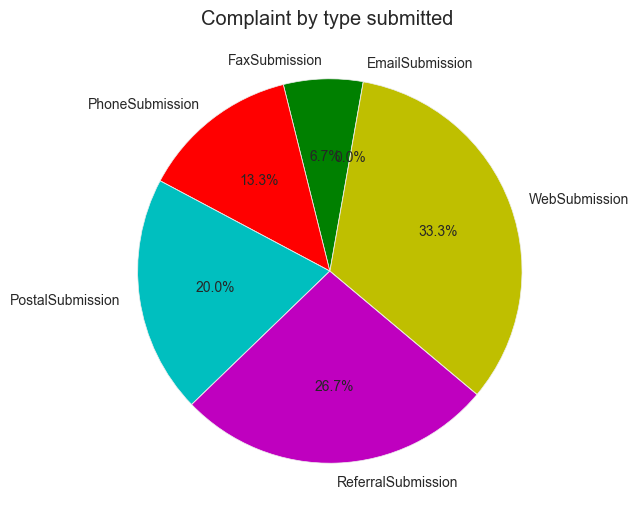

In [32]:
# Pie chart visualization 
# explode must be len(x) sequence or None
# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.2, 0.2, 0.8, 0.8])
labels = 'EmailSubmission','FaxSubmission','PhoneSubmission','PostalSubmission','ReferralSubmission','WebSubmission'
explode =(0.001, 0.001, 0.001, 0.001, 0.001, 0.001)
piechart =plt.pie(range(len(submitted_via1 )),explode=explode,labels=labels,autopct='%1.1f%%',startangle=80)
title('Complaint by type submitted ')
show(piechart)
#pdf.savefig()
savefig('Complaint by type submitted', bbox_inches='tight')

## sub product 

In [33]:
#Company_response_to_consumer
Subproduct_tab = pd.crosstab(index=df.Sub_product, columns="count_Subproduct")
Subproduct_tab 


col_0,count_Subproduct
Sub_product,
(CD) Certificate of deposit,3091
Auto,3106
Cashing a check without an account,552
Check cashing,208
Checking account,52184
Conventional adjustable mortgage (ARM),23550
Conventional fixed mortgage,64842
Credit card,24988
Credit repair,80


# Example that i should follow

#### Bar plot of median values
sns.factorplot("agency_abbr", "loan_amount_000s", data=ver, palette="PuBu_d", estimator=np.median);

#### Regression plot
sns.regplot("logloanamt", "logincome", data=ver, robust=True, ci=95, color="seagreen")
sns.despine();
#### link
http://wavedatalab.github.io/datawithpython/visualize.html

#### another link

http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html


http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html


#### using the built in function

pickle

In [34]:
df.Sub_product.describe()

count             468273
unique                47
top       Other mortgage
freq               80707
Name: Sub_product, dtype: object

In [35]:
# get the count of Consumer disagreement with the company response

Sub_product_tab = pd.crosstab(index=df.Sub_product, columns="count_Consumer_disagreement")
Sub_product_tab


col_0,count_Consumer_disagreement
Sub_product,
(CD) Certificate of deposit,3091
Auto,3106
Cashing a check without an account,552
Check cashing,208
Checking account,52184
Conventional adjustable mortgage (ARM),23550
Conventional fixed mortgage,64842
Credit card,24988
Credit repair,80


In [36]:
# get the subproduct variable statistics 
Sub_product_tab

col_0,count_Consumer_disagreement
Sub_product,
(CD) Certificate of deposit,3091
Auto,3106
Cashing a check without an account,552
Check cashing,208
Checking account,52184
Conventional adjustable mortgage (ARM),23550
Conventional fixed mortgage,64842
Credit card,24988
Credit repair,80


## Company

In [37]:
df["Company"].describe()

count              665274
unique               3926
top       Bank of America
freq                61084
Name: Company, dtype: object

In [38]:
# get the count of the companies that people are complaining about


Company_tab = pd.crosstab(index=df.Company, columns="count_company")
Company_tab 

col_0,count_company
Company,
"(Former)Shapiro, Swertfeger & Hasty, LLP",4
"1st 2nd Mortgage Company Of NJ, Inc.",1
1st Alliance Lending,14
"1st Capital Finance of South Carolina, Inc.",1
"1st Capital Mortgage, LLC",1
1st Fidelity Loan Servicing,5
1st Franklin Financial Corporation,47
1st Maryland Mortgage Corporation,1
1st Midwest Mortgage Corp,2


In [38]:
Company_tab.describe()

col_0,count_company
count,3926.000000
mean,169.453388
std,1948.624454
min,1.000000
25%,2.000000
50%,6.000000
75%,25.000000
max,61084.000000


In [39]:
# get the company that received most complaints
most_complained_company = df.Company.value_counts().max()
most_complained_company

61084

In [40]:
# get the top 10 companies that received most complaints order by the highest one
top_10_complaint_by_company =df.Company.value_counts().nlargest(10)
top_10_complaint_by_company

Bank of America                           61084
Wells Fargo & Company                     48357
Equifax                                   41586
Experian                                  39315
JPMorgan Chase & Co.                      38496
TransUnion Intermediate Holdings, Inc.    33629
Citibank                                  30906
Ocwen                                     22827
Capital One                               17941
Nationstar Mortgage                       14902
Name: Company, dtype: int64

In [41]:
# mean 
means = df1.Company.value_counts().mean()

#standard deviation
errors = df1.Company.value_counts().std()


In [42]:
# print both the mean and the standard deviation
print (means)
print(errors)

169.45338767193073
1948.6244544423573


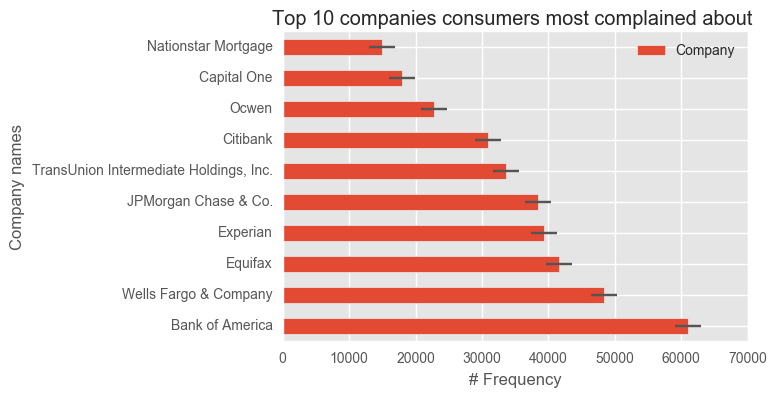

In [49]:


top_10_complaint_by_company.plot(kind='barh',xerr=errors)


plt.xlabel('# Frequency')
plt.ylabel('Company names')
plt.title('Top 10 companies consumers most complained about ')
plt.legend(loc='upper right')
plt.show()

In [43]:
# top 10 companies consumers least complained about
_10_least_complaint =df.Company.value_counts().nsmallest(10)
_10_least_complaint

Great Western Bancorp, Inc.                          1
DPL Associates, Ltd.                                 1
KAHRS LAW OFFICES, PA                                1
Bankers Mortgage Lending, Inc.                       1
Assurance Financial Group, LLC                       1
Kwik Mortgage Corporation                            1
Consider It Collected, LLC                           1
Modlin & Associates, P.A.                            1
Bureau of Medical Economics of Santa Clara County    1
Chrome Capital Group LLC                             1
Name: Company, dtype: int64

### get how many debt collection complaint the Bank of America received every day, month, year?

In [44]:
# create a new df with product and company as variables using loc
newDf = df.loc[:,('Product','Company')]
newDf.head(3)
#print("now that the df has been created, a selection must be apply so that Bank of American and debt collection values can be analysed")

,Product,Company
Date_sent_to_company,,
2013-07-30,Consumer Loan,Wells Fargo & Company
2013-07-31,Bank account or service,Wells Fargo & Company
2013-07-31,Bank account or service,Santander Bank US


In [45]:
# add new variables the the dataframe 
newDf["Bank_of_America"] = newDf["Company"].str.contains("Bank of America")
newDf["debt_Collection"] = newDf["Product"].str.contains("Debt collection")
newDf.head(1)



,Product,Company,Bank_of_America,debt_Collection
Date_sent_to_company,,,,
2013-07-30,Consumer Loan,Wells Fargo & Company,False,False


In [46]:
# drop the unnecessary variables
variableToDrop = ['Product', 'Company']

# Verify whether there are some missing values(nan) in the postcode field, then drop those
newDf= newDf.drop(variableToDrop,1)


newDf.head(1)


,Bank_of_America,debt_Collection
Date_sent_to_company,,
2013-07-30,False,False


In [47]:
# discretise the values in both variable 
newDf.Bank_of_America = newDf.Bank_of_America.astype(int)    # discretise the values in both variable bank of america
newDf.debt_Collection = newDf.debt_Collection.astype(int)    # discretise the values in both variable debt collection

newDf.head()                                                # printout the data sample

,Bank_of_America,debt_Collection
Date_sent_to_company,,
2013-07-30,0,0
2013-07-31,0,0
2013-07-31,0,0
2013-07-30,0,0
2013-07-30,0,0


In [48]:
newDf['weekday'] = newDf.index.weekday

newDf.head(1)    

,Bank_of_America,debt_Collection,weekday
Date_sent_to_company,,,
2013-07-30,0,0,1


In [49]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
newDf['weekday'] = newDf['weekday'].map(lambda x: days[x])
newDf.head(1)

,Bank_of_America,debt_Collection,weekday
Date_sent_to_company,,,
2013-07-30,0,0,Tuesday


In [50]:

debt_table = pd.crosstab(index=newDf["weekday"], 
                          columns=newDf["debt_Collection"])

debt_table 


debt_Collection,0,1
weekday,,
Friday,89928,20000
Monday,90842,19824
Saturday,38950,9651
Sunday,40064,10078
Thursday,92886,21545
Tuesday,93523,21251
Wednesday,95602,21130


In [51]:
debt_table.describe()

debt_Collection,0,1
count,7.000000,7.000000
mean,77399.285714,17639.857143
std,25952.192166,5351.259460
min,38950.000000,9651.000000
25%,64996.000000,14951.000000
50%,90842.000000,20000.000000
75%,93204.500000,21190.500000
max,95602.000000,21545.000000


In [52]:

Americabank_debt_table = pd.crosstab(index=newDf["weekday"], 
                          columns=newDf["Bank_of_America"])

Americabank_debt_table

Bank_of_America,0,1
weekday,,
Friday,99637,10291
Monday,100121,10545
Saturday,44697,3904
Sunday,46104,4038
Thursday,103730,10701
Tuesday,104178,10596
Wednesday,105723,11009


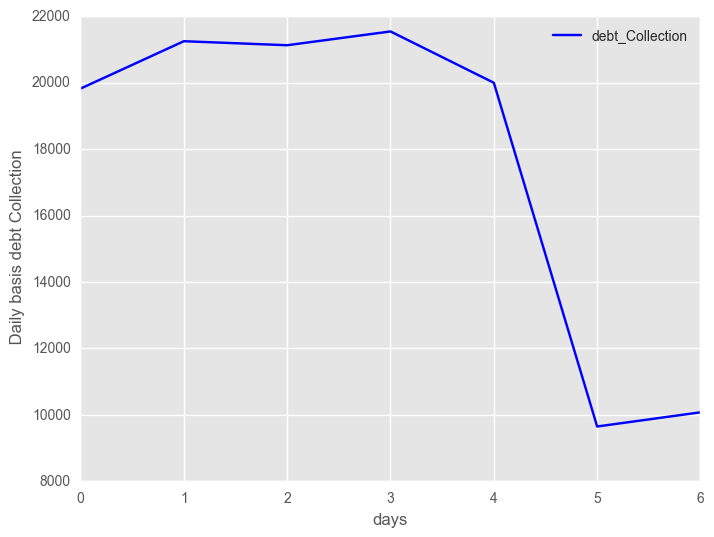

In [261]:
dailycollection = newDf["debt_Collection"].groupby(newDf.index.weekday).aggregate(np.sum)

plt.plot(dailycollection,color='blue' )
plt.xlabel('days')
plt.ylabel(' Daily basis debt Collection')
plt.legend(loc='upper right')
plt.show()



In [53]:

df = df.dropna(subset=["Timely_response_yes_no"])

## Timely_response

In [54]:
df["Timely_response_yes_no"].describe()

count     665274
unique         2
top          Yes
freq      647658
Name: Timely_response_yes_no, dtype: object

In [55]:
# count yes or no 
#Timely response?(yes/no)
Timely_response_tab = pd.crosstab(index=df.Timely_response_yes_no, columns="count_Timely_response")
Timely_response_tab

col_0,count_Timely_response
Timely_response_yes_no,
No,17616
Yes,647658


In [56]:
Timely_response_tab.describe()


col_0,count_Timely_response
count,2.000000
mean,332637.000000
std,445506.970632
min,17616.000000
25%,175126.500000
50%,332637.000000
75%,490147.500000
max,647658.000000


In [57]:
# create additional columns to extract the boolean yes,no
df1["YesTimelyresponse"]= df1.Timely_response_yes_no.str.contains("Yes")
df1["NoTimelyresponse"]= df1.Timely_response_yes_no.str.contains("No")

In [58]:

df1.YesTimelyresponse = df1.YesTimelyresponse.astype(int)
df1.NoTimelyresponse = df1.NoTimelyresponse.astype(int)

In [59]:
# create a new data frame  which select individual Complaint submission type
# This will allow easy plotting of the variable Complaint_Submission_type

df_comp_resp=df1.loc[:,["YesTimelyresponse","NoTimelyresponse"]]


df_comp_resp.head(2)

,YesTimelyresponse,NoTimelyresponse
Date_sent_to_company,,
2013-07-30,1,0
2013-07-31,1,0


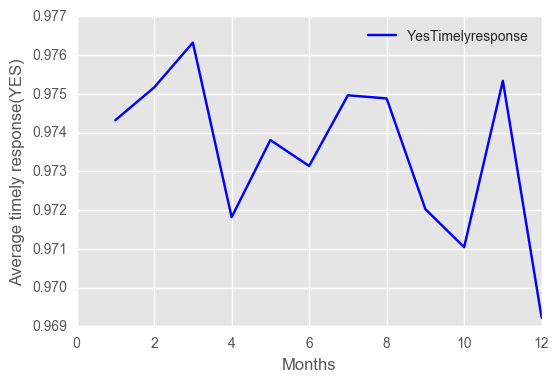

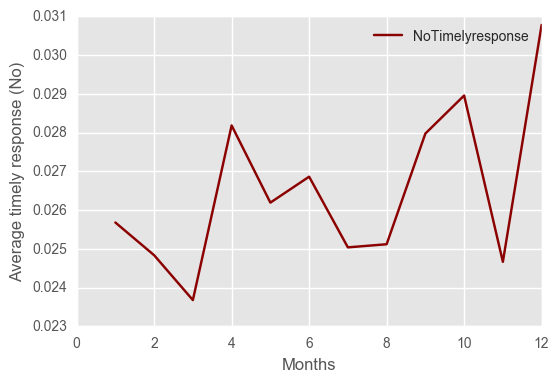

In [60]:


monthMeans = df_comp_resp["YesTimelyresponse"].groupby(df_comp_resp.index.month).aggregate(np.mean)

plt.plot(monthMeans,color='blue' )
plt.xlabel('Months')
plt.ylabel('Average timely response(YES)')
plt.legend(loc='upper right')
plt.show()


monthMeans1 = df_comp_resp["NoTimelyresponse"].groupby(df_comp_resp.index.month).aggregate(np.mean)
plt.plot(monthMeans1,color='darkred')
plt.xlabel('Months')
plt.ylabel('Average timely response (No)')
plt.legend(loc='upper right')
plt.show()


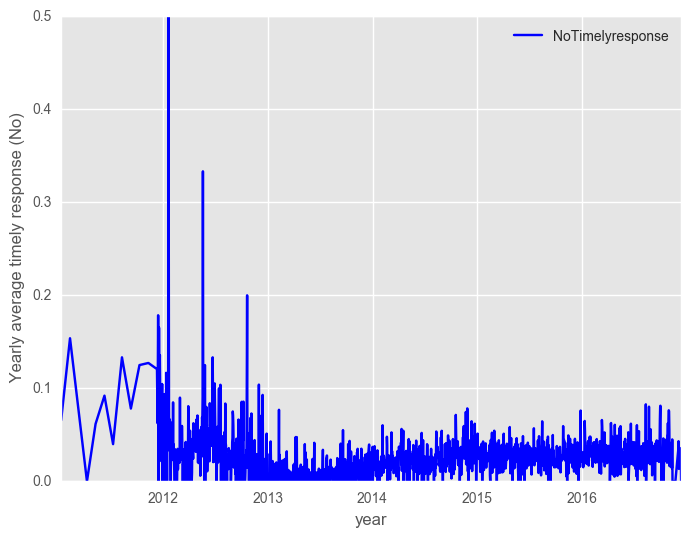

In [61]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]

 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size



monthMeans1 = df_comp_resp["NoTimelyresponse"].groupby(df_comp_resp.index).aggregate(np.mean)
plt.plot(monthMeans1,color='blue')
plt.xlabel('year')
plt.ylabel(' Yearly average timely response (No)')
plt.legend(loc='upper right')
plt.show()
#savefig('Yearly average timely response.png')


In [62]:
df["issue"].describe()

count                                       665274
unique                                          95
top       Loan modification,collection,foreclosure
freq                                        105651
Name: issue, dtype: object

## issue

In [63]:

Issue_tab = pd.crosstab(index=df.issue, columns="count_issue")
Issue_tab 

col_0,count_issue
issue,
APR or interest rate,5086
"Account opening, closing, or management",32656
Account terms and changes,468
Adding money,180
Advertising and marketing,2633
"Advertising, marketing or disclosures",63
Application processing delay,452
"Application, originator, mortgage broker",15436
Applied for loan/did not receive money,314


In [64]:
Issue_tab.describe()

col_0,count_issue
count,95.000000
mean,7002.884211
std,16633.801048
min,1.000000
25%,294.000000
50%,1675.000000
75%,5444.500000
max,105651.000000


In [65]:
# get the top 5 issues people complianed about
top_5_complaint_issue =df1.issue.value_counts().nlargest(5)
top_5_complaint_issue

Loan modification,collection,foreclosure    105651
Incorrect information on credit report       86554
Loan servicing, payments, escrow account     69749
Cont'd attempts collect debt not owed        51275
Account opening, closing, or management      32656
Name: issue, dtype: int64

In [66]:
top_5_complaint_issue.describe()

count         5.000000
mean      69177.000000
std       28665.768061
min       32656.000000
25%       51275.000000
50%       69749.000000
75%       86554.000000
max      105651.000000
Name: issue, dtype: float64

In [67]:
# mean 
means1 = df1.issue.value_counts().mean()

#standard deviation of issues
errors1 = df1.issue.value_counts().std()

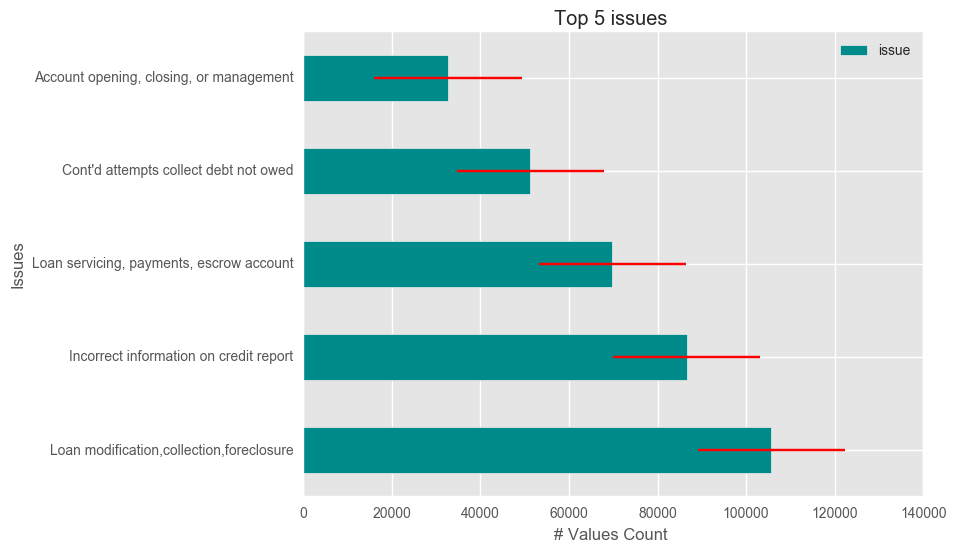

In [68]:
top_5_complaint_issue.plot(kind='barh',color='darkcyan',xerr=errors1,ecolor='r')


plt.xlabel('# Values Count ')
plt.ylabel('Issues')
plt.title('Top 5 issues ')
plt.legend(loc='upper right')
plt.show()

#### creating a series

In [39]:
state_filter = ((df["Product"] == "Credit card" ) & 
                   (df["State"] == "CA" ))
                   

# Let's make a copy to work with a new, clean block of memory 
# (if you are interested, try and remove the copy to see the consequences further down...)
CA_Creditcard =df[state_filter].copy()
#european_stations["Country"].unique()
CA_Creditcard.head(1)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,,,,,,,,,,,,,,,,
2013-07-29,07/30/2013,Credit card,NaN,Credit determination,NaN,NaN,NaN,Wells Fargo & Company,CA,95409,NaN,Web,Closed with explanation,Yes,No,False,False,False,False,False,True


In [40]:

CAcrdedit_card = CA_Creditcard.loc[:,("Product", "State") ]  


In [41]:
CAcrdedit_card.describe()

,Product,State
count,10829,10829
unique,1,1
top,Credit card,CA
freq,10829,10829


In [50]:
state_filter = ((df["Product"] == "Credit card" ) & 
                   (df["State"] == "MT" ))
                   

# Let's make a copy to work with a new, clean block of memory 
# (if you are interested, try and remove the copy to see the consequences further down...)
MT_Creditcard =df[state_filter].copy()
#european_stations["Country"].unique()
MT_Creditcard.head(1)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,,,,,,,,,,,,,,,,
2013-07-31,07/30/2013,Credit card,NaN,Credit determination,NaN,NaN,NaN,Bank of America,FL,34983,NaN,Web,Closed with explanation,Yes,Yes,False,False,False,False,False,True


In [43]:

MTcrdedit_card = MT_Creditcard.loc[:,("Product", "State") ]  

In [44]:
MTcrdedit_card.describe()

,Product,State
count,155,155
unique,1,1
top,Credit card,MT
freq,155,155


In [52]:
company_filter = ((df["Product"] == "Credit card" ) & 
                   (df["Company"] == "Bank of America" ))
                   

# Let's make a copy to work with a new, clean block of memory 
# (if you are interested, try and remove the copy to see the consequences further down...)
Creditcard =df[company_filter].copy()
#european_stations["Country"].unique()
Creditcard.head(1)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,,,,,,,,,,,,,,,,
2013-07-31,07/30/2013,Credit card,NaN,Credit determination,NaN,NaN,NaN,Bank of America,FL,34983,NaN,Web,Closed with explanation,Yes,Yes,False,False,False,False,False,True


In [55]:
 BoACreditcard = Creditcard.loc[:,("Product", "Company") ]  

In [56]:
# get the dummies value
BoACreditcard = pd.get_dummies( BoACreditcard)
BoACreditcard.head()

,Product_Credit card,Company_Bank of America
Date_sent_to_company,,
2013-07-31,1,1
2013-02-08,1,1
2013-05-08,1,1
2013-07-22,1,1
2013-07-25,1,1


In [ ]:
import seaborn as sns

g = sns.lmplot(x='social_med',
               y='life_sat',
               data=,
               hue='year',
               x_jitter=0.15,
               y_jitter=0.15,
               legend=False,
               col='year',
               col_wrap=2)

g.set(xlim=(0, 5))
g.set(ylim=(0, 5))
g.fig.suptitle('Life satisfaction & active social media accounts')
plt.subplots_adjust(top=0.93)
g.set(xlabel='social media accounts')
g.set(ylabel='life satisfaction')
plt.show()